#### Brief Introduction about KNN Algorithm

KNN or K Nearest Neighbor algorithm is an algorithm that relies on distance measurement basically. It is used for both Classification and Regression problems. The **"K"** in KNN indicates the number of Neighbors you want to consider to build the algorithm. Some of the commonly used distance measures are, **Euclidean Distance, Manhattan Distance Minkowsky Distance** etc. We will briefly look at soe of them. 

To put it simply, the way it works is that, given a value of K, the algorithm measures the distance between the point under consideration and its K nearest neighbors, then in the case of Classification, the algorithm considers the Mode among the K nearest neighbors and then classifies an out of sample data as that Mode value. In case of Regression, the algorithm basically takes the mean of K observations that are closest and then assigns the value. 

Euclidean distance basically uses the Pythagoras theorem to calculate the distance between two points, it is given by the formula as below. Consider A(X1,Y1) and B(X2,Y2) be the coordinates of the two points, then distanc between them is given by,
                                      
                                      Distance = sqrt((X2-X1)^2 + (Y2-Y1)^2)

The Manhattan distance does not use Pythagoras theorem, but instead it considers the absolute value value of the distance between two points, it is given by the formula below. Consider the same points A and B.
                                       
                                          Distance = |(X2-X1)|+|(Y2-Y1)|
                                          
One should always be careful about Outliers in the case of Regression problems and Imbalanced classification problems while running KNN Algorithms. 

In [106]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [107]:
train = pd.read_csv("C:/Users/kulka/Desktop/Others/KNN/train_v9rqX0R.csv")
test  = pd.read_csv("C:/Users/kulka/Desktop/Others/KNN/test_AbJTz2l.csv")

Submission = test[['Item_Identifier','Outlet_Identifier']]

In [108]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [110]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### EDA-Train Data

In [111]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [112]:
# Getting the number of unique values for each categorical variable, excluding the id variable.
for col in train.columns:
    if (train[col].dtype == "object") and (col !="Item_Identifier"):
        print ("Number of Unique Values in the {} variable are:{}".format(col,train[col].nunique()))

Number of Unique Values in the Item_Fat_Content variable are:5
Number of Unique Values in the Item_Type variable are:16
Number of Unique Values in the Outlet_Identifier variable are:10
Number of Unique Values in the Outlet_Size variable are:3
Number of Unique Values in the Outlet_Location_Type variable are:3
Number of Unique Values in the Outlet_Type variable are:4


In [113]:
# Getting the value_counts of the categorical variables,including the missing values
for col in train.columns:
    if (train[col].dtype == "object") and (col !="Item_Identifier"):
        print ("Number of Unique Values in the {} variable are:\n{}".format(col,train[col].value_counts(dropna=False)))
        print ("--------------------------------------------------------------")

Number of Unique Values in the Item_Fat_Content variable are:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
--------------------------------------------------------------
Number of Unique Values in the Item_Type variable are:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
--------------------------------------------------------------
Number of Unique Values in the Outlet_Identifier variable are:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    9

In [114]:
# Getting the numerical statistics like mean, median, std etc for continuous variables.
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Dependent Variable - Item_Outlet_Sales

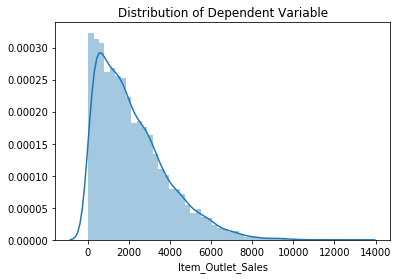

In [115]:
# Distribution of Dependent Variable.
sns.distplot(train['Item_Outlet_Sales']);
plt.title("Distribution of Dependent Variable");

This looks like a Positively Skewed Distribution.

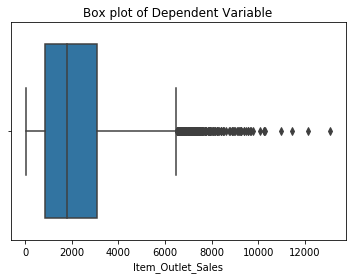

In [116]:
# Box plot of dependent variable, to check any outliers
sns.boxplot(train['Item_Outlet_Sales']);
plt.title("Box plot of Dependent Variable");

Looks like there are some large values, they may or may not be considered as outliers.

#### Independent Variables

In [117]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

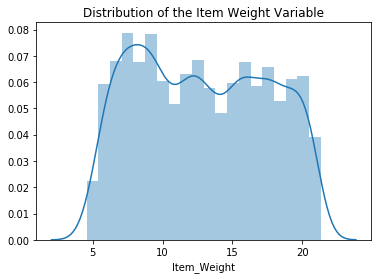

In [118]:
sns.distplot(train['Item_Weight']);
plt.title("Distribution of the Item Weight Variable");
# Looks like the variable has multiple peaks and majority of the values are between 5 and 20.

In [119]:
train['Item_Fat_Content'].value_counts(dropna=False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Text(0, 0.5, 'Count')

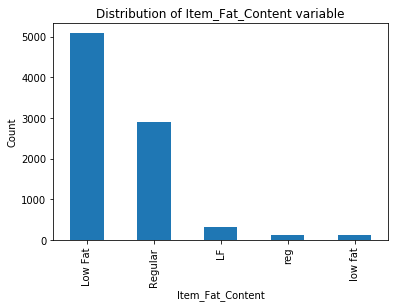

In [120]:
train['Item_Fat_Content'].value_counts(dropna=False).plot.bar();
plt.title("Distribution of Item_Fat_Content variable");
plt.xlabel("Item_Fat_Content");
plt.ylabel("Count")
# Looks like Low Fat, low fat and LF mean the same and similarly reg is referring to Regular , this should be combined.
# Most of the items are of Low Fat Type

In [121]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

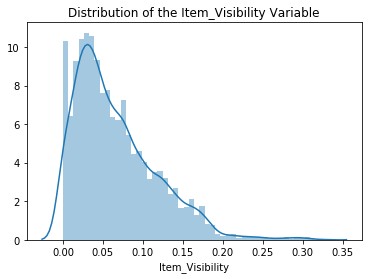

In [122]:
sns.distplot(train['Item_Visibility']);
plt.title("Distribution of the Item_Visibility Variable");
# This again looks like positively skewed distribution. Lot of values that are 0 which does not make sense. 

In [123]:
train['Item_Type'].value_counts(dropna=False)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Text(0, 0.5, 'Count')

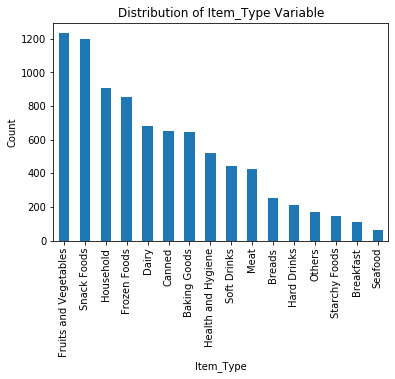

In [124]:
train['Item_Type'].value_counts(dropna=False).plot.bar();
plt.title("Distribution of Item_Type Variable");
plt.xlabel("Item_Type");
plt.ylabel("Count")
# There are multiple categories here which may or may not be combined.

In [125]:
train['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

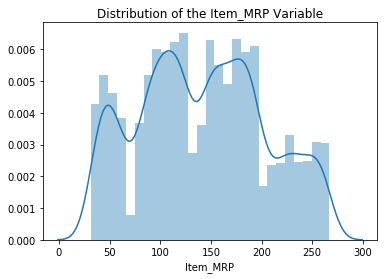

In [126]:
sns.distplot(train['Item_MRP']);
plt.title("Distribution of the Item_MRP Variable");
# This too looks not a m=normal plot and the values range from 31 to 266. There are a few groups within the MRP observed.

In [127]:
train['Outlet_Identifier'].value_counts(dropna=False)

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Text(0, 0.5, 'Count')

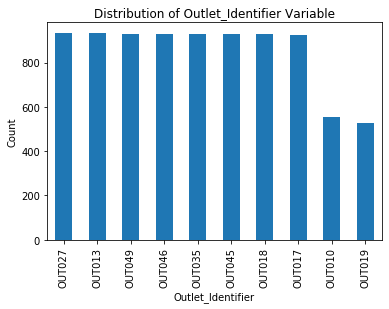

In [128]:
train['Outlet_Identifier'].value_counts(dropna=False).plot.bar();
plt.title("Distribution of Outlet_Identifier Variable");
plt.xlabel("Outlet_Identifier");
plt.ylabel("Count")
# Most of the outlets have the same count except 2 which have lower count.

In [129]:
train['Outlet_Establishment_Year'].value_counts(dropna=False)

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Text(0, 0.5, 'Count')

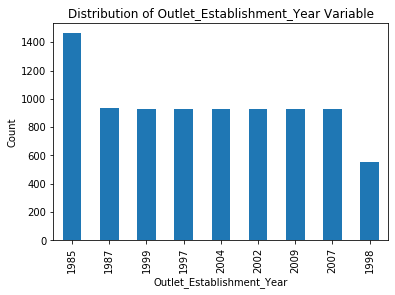

In [130]:
train['Outlet_Establishment_Year'].value_counts(dropna=False).plot.bar();
plt.title("Distribution of Outlet_Establishment_Year Variable");
plt.xlabel("Outlet_Establishment_Year");
plt.ylabel("Count")
# Most of the outlets were established in the year 1985, we may not need the exact year, but the years of operation.

In [131]:
train['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

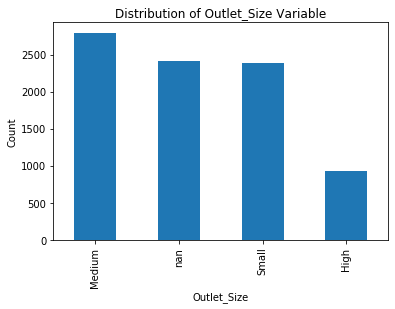

In [132]:
train['Outlet_Size'].value_counts(dropna=False).plot.bar();
plt.title("Distribution of Outlet_Size Variable");
plt.xlabel("Outlet_Size");
plt.ylabel("Count");
# There are some missing values which need to be imputed either by creating a new category, or replacing with mode.

In [133]:
train['Outlet_Type'].value_counts(dropna=False)

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

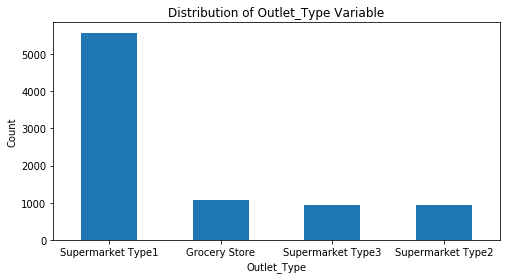

In [134]:
plt.figure(figsize=(8,4));
train['Outlet_Type'].value_counts(dropna=False).plot.bar();
plt.title("Distribution of Outlet_Type Variable");
plt.xlabel("Outlet_Type");
plt.ylabel("Count");
plt.xticks(rotation=360);
# Most of the outlets are of the type Supermarket Type-1 and the other types have almost the same count.

#### Bi-Variate Analysis

In [135]:
df = pd.crosstab(index=train['Item_Type'],columns=train['Item_Fat_Content'])
df.style.background_gradient(cmap='Reds')
# We can see that majority of snack foods have low fat and so do Fruits and Vegetables, Soft Drinks, 
# Majority of Meat have regular fat.

Item_Fat_Content,LF,Low Fat,Regular,low fat,reg
Item_Type,,,,,
Baking Goods,20,301,306,8,13
Breads,8,126,108,6,3
Breakfast,2,39,67,0,2
Canned,17,314,297,10,11
Dairy,24,382,258,12,6
Frozen Foods,22,424,387,4,19
Fruits and Vegetables,39,580,577,11,25
Hard Drinks,8,199,0,7,0
Health and Hygiene,29,481,0,10,0


In [136]:
df = pd.crosstab(index=train['Outlet_Size'],columns=train['Outlet_Type'])
df.style.background_gradient(cmap='Reds')
# We can see that almost all of the Outlets with high size are of the type Sepermarket Type 1.
# We can see that Medium sized outlets do not have grocery stores. 
# Small sized outlets are of Grocery and Supermarket Type1.

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [137]:
df = pd.crosstab(index=train['Outlet_Location_Type'],columns=train['Outlet_Type'])
df.style.background_gradient(cmap='Reds')
# Tier 1 cities have Grocery and Supermarket Type 1.
# Tier 2 cities have only Supermarket Type 1.
# Tier 3 cities have all the types of Outlets

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


In [138]:
df = pd.crosstab(index=train['Outlet_Location_Type'],columns=train['Outlet_Size'])
df.style.background_gradient(cmap='Reds')
# Tier 1 cities have Medium and Small outlets
# Tier 2 cities have Only Small sized outlets
# Tier 3 citis do not have Small outlets.

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,930
Tier 3,932,1863,0


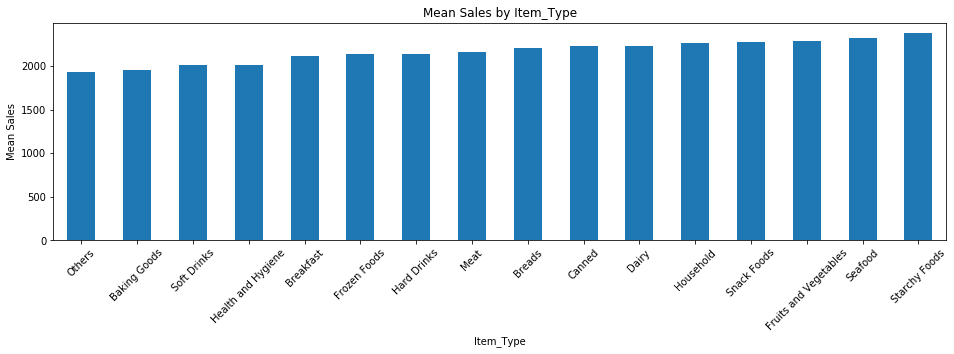

In [139]:
plt.figure(figsize=(16,4));
train.groupby("Item_Type")['Item_Outlet_Sales'].mean().sort_values().plot.bar();
plt.title("Mean Sales by Item_Type");
plt.xlabel("Item_Type");
plt.ylabel("Mean Sales");
plt.xticks(rotation=45);
# We can see that there is not substantial difference in the mean sales between the Item_Types.

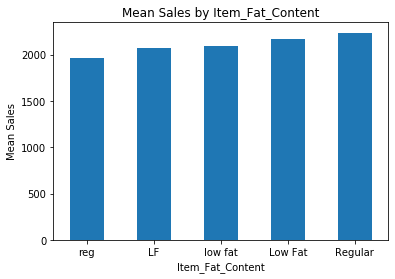

In [140]:
train.groupby("Item_Fat_Content")['Item_Outlet_Sales'].mean().sort_values().plot.bar();
plt.title("Mean Sales by Item_Fat_Content");
plt.xlabel("Item_Fat_Content");
plt.ylabel("Mean Sales");
plt.xticks(rotation=360);
# Now that the values in the Item_Fat_Countent are not combined, the difference may not appear big.

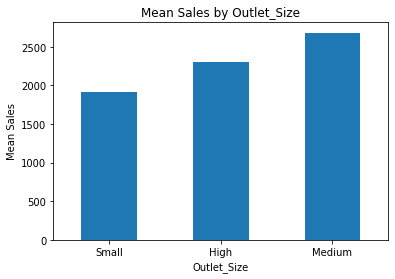

In [141]:
train.groupby("Outlet_Size")['Item_Outlet_Sales'].mean().sort_values().plot.bar();
plt.title("Mean Sales by Outlet_Size");
plt.xlabel("Outlet_Size");
plt.ylabel("Mean Sales");
plt.xticks(rotation=360);
# We can see that Medium outlets have migher mean sales as compared to High and small sized outlets.

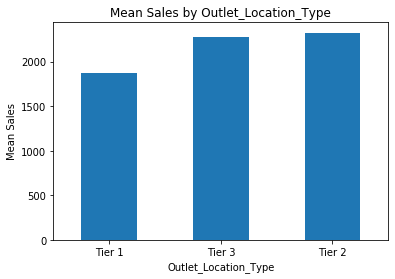

In [142]:
train.groupby("Outlet_Location_Type")['Item_Outlet_Sales'].mean().sort_values().plot.bar();
plt.title("Mean Sales by Outlet_Location_Type");
plt.xlabel("Outlet_Location_Type");
plt.ylabel("Mean Sales");
plt.xticks(rotation=360);
# We can see that Ouelets in Tier 2 and Tier 3 cities have almost same Mean Sales as compared to Tier  cities.

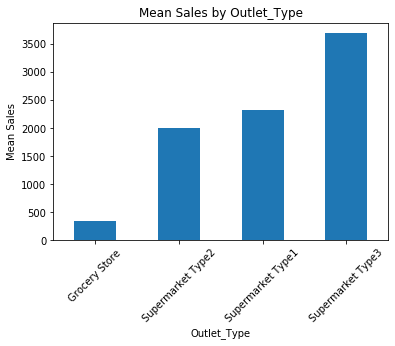

In [143]:
train.groupby("Outlet_Type")['Item_Outlet_Sales'].mean().sort_values().plot.bar();
plt.title("Mean Sales by Outlet_Type");
plt.xlabel("Outlet_Type");
plt.ylabel("Mean Sales");
plt.xticks(rotation=45);
# We can see that Supermarket Type 3 have highest mean sales and Grocery Stores have lowest. 
# Not a substantial difference between Supermarket Type 2 and Type 1 mean sales.

#### Correlation

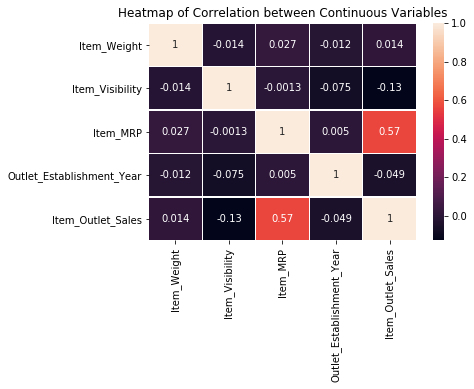

In [144]:
sns.heatmap(train.corr(),annot=True,linewidths=0.25);
plt.title("Heatmap of Correlation between Continuous Variables");

Few things to note from the above correlation plot,
1. Only Item_MRP has high correlation with the dependent variable (Not Very High though).
2. None of the independent variables are highly correlated with each other, which rules out the Multicollinearity between independent variables. 
3. Item_Visibility and Outlet_Establishment_Year are negatively correlated with the dependent variable.

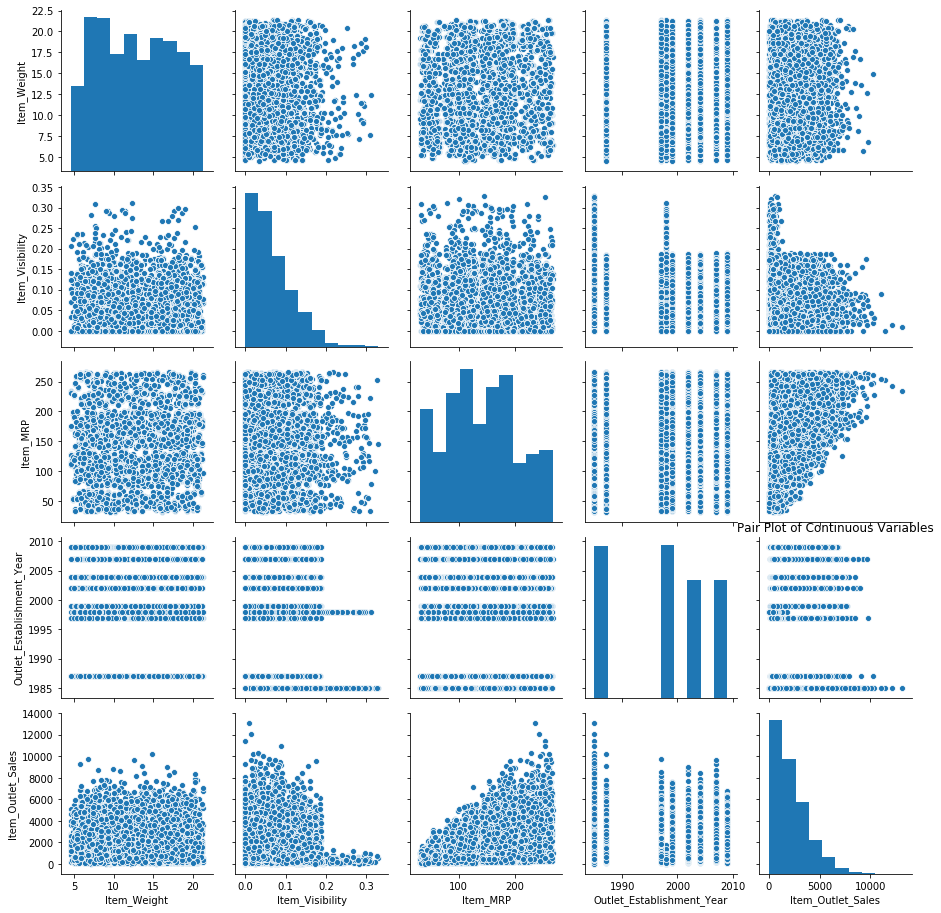

In [145]:
sns.pairplot(train);
plt.title("Pair Plot of Continuous Variables");

1. We can see from the above pair plot that Only Item_MRP seems to be strong relationship with dependent variable.

In [146]:
for df in [train,test]:
    df['Item_Fat_Content'].replace({"Low Fat":"Low_Fat","LF":"Low_Fat","low fat":"Low_Fat","reg":"Regular"},inplace=True)
    df['Item_Visibility'].replace({0:df['Item_Visibility'].mean()},inplace=True)
    df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)
    df['Outlet_Size'].fillna("Missing",inplace=True)
    df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[:2])
    df['Outlet_Establishment_Year'] = 2020 - df['Outlet_Establishment_Year']

In [147]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [148]:
# Separating the features from the target variable
X = train[[col for col in train.columns if col!="Item_Outlet_Sales"]]
y = train['Item_Outlet_Sales']

In [149]:
# Creating train, test split for training the model on train data and testing it on the test data.
X_Train, X_Test, y_Train, y_Test = train_test_split(X,y,test_size=0.25,random_state=42)
print (X_Train.shape)
print (y_Train.shape)
print (X_Test.shape)
print (y_Test.shape)

(6392, 46)
(6392,)
(2131, 46)
(2131,)


#### Building KNN Regression Model

In [150]:
reg = KNeighborsRegressor(n_neighbors=2)
reg.fit(X_Train,y_Train)
train_pred = reg.predict(X_Train)
test_pred = reg.predict(X_Test)
print ("Training RMSE is:{}".format(np.sqrt(mean_squared_error(y_Train,train_pred))))
print ("Testing RMSE is:{}".format(np.sqrt(mean_squared_error(y_Test,test_pred))))

Training RMSE is:780.5440730999156
Testing RMSE is:1315.1187380100146


We see that we got a pretty decent Testing RMSE of 1315. Now K value of 2 is very low, so we will try to increase the value of K and then see how the RMSE changes. We will run a 5 fold cross validation along with the range of K values. 

In [151]:
scores = []
for i in range(2,30,1):
    reg = KNeighborsRegressor(n_neighbors=i,)
    cv = -(cross_val_score(reg,X,y,cv=5,n_jobs=-1,scoring='neg_root_mean_squared_error'))
    scores.append(cv.mean())

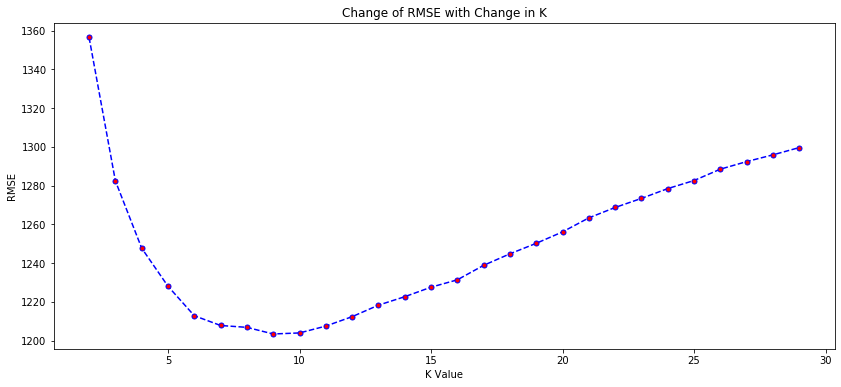

In [152]:
plt.figure(figsize=(14,6));
plt.plot(range(2,30,1),scores,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=5);
plt.title("Change of RMSE with Change in K");
plt.xlabel("K Value");
plt.ylabel("RMSE");

We can see the RMSE value starts decreasing as we increase the number of neighbors considered, but after some point of time, themodel starts overfitting and the RMSE starts increasing again, so we will have to consider the value of K at which the RMSE value is the least. 